In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
#importing the dataset
df = pd.read_csv('Churn_Modelling.csv', index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X_columns = df.columns.tolist()[2:12]
y_columns = df.columns.tolist()[-1:]
print(f'All columns: {df.columns.tolist()}')
print()
print(f'X values: {X_columns}')
print()
print(f'y values: {y_columns}')

All columns: ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

y values: ['Exited']


In [4]:
X = df[X_columns].values   # Credit Score through Estimated Salary
y = df[y_columns].values   # Exited

In [5]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis

print(X[:8,1], '... will now become: ')

from sklearn.preprocessing import LabelEncoder
label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])

print(X[:8,1])

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become: 
[0 2 0 0 2 2 0 1]


In [6]:
# We will do the same thing for gender. this will be binary in this dataset

print(X[:6,2], '... will now become: ')

from sklearn.preprocessing import LabelEncoder
label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])

print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [8]:
X = pipeline.fit_transform(X)

In [9]:
# Splitting the dataset into the Training and Testing set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 11), (8000, 1)
testing shapes: (2000, 11), (2000, 1)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()

In [12]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1))

In [13]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 

In [14]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid'))

In [15]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [16]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [17]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Epoch 1/200
225/225 - 5s - loss: 0.7696 - accuracy: 0.4572 - val_loss: 0.6576 - val_accuracy: 0.7563 - 5s/epoch - 21ms/step
Epoch 2/200
225/225 - 0s - loss: 0.6301 - accuracy: 0.7725 - val_loss: 0.6038 - val_accuracy: 0.7937 - 226ms/epoch - 1ms/step
Epoch 3/200
225/225 - 0s - loss: 0.5848 - accuracy: 0.7961 - val_loss: 0.5637 - val_accuracy: 0.7950 - 256ms/epoch - 1ms/step
Epoch 4/200
225/225 - 0s - loss: 0.5398 - accuracy: 0.7961 - val_loss: 0.5119 - val_accuracy: 0.7950 - 211ms/epoch - 938us/step
Epoch 5/200
225/225 - 0s - loss: 0.4973 - accuracy: 0.7969 - val_loss: 0.4689 - val_accuracy: 0.7962 - 223ms/epoch - 991us/step
Epoch 6/200
225/225 - 0s - loss: 0.4617 - accuracy: 0.8057 - val_loss: 0.4322 - val_accuracy: 0.8150 - 257ms/epoch - 1ms/step
Epoch 7/200
225/225 - 0s - loss: 0.4383 - accuracy: 0.8201 - val_loss: 0.4098 - val_accuracy: 0.8313 - 255ms/epoch - 1ms/step
Epoch 8/200
225/225 - 0s - loss: 0.4277 - accuracy: 0.8247 - val_loss: 0.3995 - val_accuracy: 0.8300 - 209ms/epoch -

Epoch 65/200
225/225 - 0s - loss: 0.3665 - accuracy: 0.8489 - val_loss: 0.3298 - val_accuracy: 0.8612 - 211ms/epoch - 938us/step
Epoch 66/200
225/225 - 0s - loss: 0.3646 - accuracy: 0.8474 - val_loss: 0.3298 - val_accuracy: 0.8612 - 211ms/epoch - 938us/step
Epoch 67/200
225/225 - 0s - loss: 0.3615 - accuracy: 0.8500 - val_loss: 0.3281 - val_accuracy: 0.8650 - 212ms/epoch - 942us/step
Epoch 68/200
225/225 - 0s - loss: 0.3637 - accuracy: 0.8493 - val_loss: 0.3296 - val_accuracy: 0.8587 - 207ms/epoch - 920us/step
Epoch 69/200
225/225 - 0s - loss: 0.3630 - accuracy: 0.8517 - val_loss: 0.3304 - val_accuracy: 0.8600 - 213ms/epoch - 947us/step
Epoch 70/200
225/225 - 0s - loss: 0.3664 - accuracy: 0.8449 - val_loss: 0.3316 - val_accuracy: 0.8562 - 203ms/epoch - 902us/step
Epoch 71/200
225/225 - 0s - loss: 0.3614 - accuracy: 0.8504 - val_loss: 0.3271 - val_accuracy: 0.8625 - 203ms/epoch - 902us/step
Epoch 72/200
225/225 - 0s - loss: 0.3647 - accuracy: 0.8476 - val_loss: 0.3286 - val_accuracy: 0.

Epoch 129/200
225/225 - 0s - loss: 0.3616 - accuracy: 0.8518 - val_loss: 0.3278 - val_accuracy: 0.8650 - 209ms/epoch - 929us/step
Epoch 130/200
225/225 - 0s - loss: 0.3594 - accuracy: 0.8546 - val_loss: 0.3269 - val_accuracy: 0.8625 - 210ms/epoch - 933us/step
Epoch 131/200
225/225 - 0s - loss: 0.3585 - accuracy: 0.8551 - val_loss: 0.3259 - val_accuracy: 0.8637 - 212ms/epoch - 942us/step
Epoch 132/200
225/225 - 0s - loss: 0.3540 - accuracy: 0.8535 - val_loss: 0.3261 - val_accuracy: 0.8675 - 210ms/epoch - 933us/step
Epoch 133/200
225/225 - 0s - loss: 0.3605 - accuracy: 0.8485 - val_loss: 0.3267 - val_accuracy: 0.8675 - 213ms/epoch - 947us/step
Epoch 134/200
225/225 - 0s - loss: 0.3625 - accuracy: 0.8533 - val_loss: 0.3269 - val_accuracy: 0.8700 - 210ms/epoch - 933us/step
Epoch 135/200
225/225 - 0s - loss: 0.3615 - accuracy: 0.8540 - val_loss: 0.3269 - val_accuracy: 0.8675 - 211ms/epoch - 938us/step
Epoch 136/200
225/225 - 0s - loss: 0.3623 - accuracy: 0.8529 - val_loss: 0.3279 - val_accu

225/225 - 0s - loss: 0.3600 - accuracy: 0.8500 - val_loss: 0.3276 - val_accuracy: 0.8687 - 234ms/epoch - 1ms/step
Epoch 193/200
225/225 - 0s - loss: 0.3597 - accuracy: 0.8522 - val_loss: 0.3271 - val_accuracy: 0.8687 - 208ms/epoch - 924us/step
Epoch 194/200
225/225 - 0s - loss: 0.3615 - accuracy: 0.8537 - val_loss: 0.3265 - val_accuracy: 0.8712 - 211ms/epoch - 938us/step
Epoch 195/200
225/225 - 0s - loss: 0.3616 - accuracy: 0.8510 - val_loss: 0.3276 - val_accuracy: 0.8662 - 215ms/epoch - 956us/step
Epoch 196/200
225/225 - 0s - loss: 0.3551 - accuracy: 0.8535 - val_loss: 0.3256 - val_accuracy: 0.8675 - 222ms/epoch - 987us/step
Epoch 197/200
225/225 - 0s - loss: 0.3570 - accuracy: 0.8524 - val_loss: 0.3265 - val_accuracy: 0.8662 - 241ms/epoch - 1ms/step
Epoch 198/200
225/225 - 0s - loss: 0.3601 - accuracy: 0.8550 - val_loss: 0.3277 - val_accuracy: 0.8675 - 246ms/epoch - 1ms/step
Epoch 199/200
225/225 - 0s - loss: 0.3567 - accuracy: 0.8557 - val_loss: 0.3277 - val_accuracy: 0.8662 - 245ms

In [18]:
type(history)

keras.callbacks.History

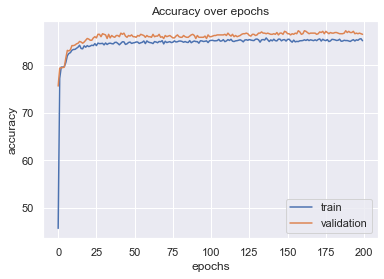

In [19]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [20]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

63/63 [==============================] - 0s 1000us/step
[[0.24020605]
 [0.29757938]
 [0.17315397]
 [0.07032667]
 [0.11105511]]


In [21]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1552   43]
 [ 227  178]]


In [23]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

86.5 % of testing data was classified correctly
